Vamos a modelar a través de un experimento aleatorio, la ley **(función de densidad de una v.a. uniforme discreta)**

##Ejemplo de una v.a. uniforme

Sea el experimento aleatorio de lanzar dos dados justos:
* $\Omega = \{1, 2, 3, 4, 5, 6\}\times\{1,2,3,4,5,6\}$
* $\mathcal{F}=P(\Omega)$
* Para $w =(i,j)$ donde $i,j,\in\{1,...,6\}$ talque
$$\mathbb{P}( \{ \omega\} ) =\frac{1}{36}$$

Vamos a definir la siguiente variable aleatoria
$$S: \Omega \to R_{S}$$

donde $R_{S} \{2,3,4,5,6,7,8,9,10,11,12\}$

Para que entendamos la ley de una v.a., basta con entender los siguientes datos

$$\{(k,\mathbb{P}(S=k))\}_{k\in R_{S}}$$

*Vamos a entender a $S$ como eventos.*
Sea $S_{n}$ el evento de la suma de las caras es $n$.

$$S_{n} = {(i,j)\in \Omega \mid i+j=n}$$


In [ ]:
from itertools import product #para el producto cartesiano
from fractions import Fraction

Primero vamos a crear una función de **probabilidad global**

In [ ]:
def P(A, Omega):
  P=Fraction(len(A),len(Omega))
  return P

In [ ]:
S_2={(i,j) for i in range(1,7) for j in range(1,7) if i+j ==2}
S_2

{(1, 1)}

***Nota:***
Realizar esto para cada valor de $n$ quita tiempo.
Vamos a hacer esto utilizando ***diccionarios.***

In [ ]:
#Primero vamos a crear a nuestro espacio muestral Omega
L=[i for i in range(1,7)] #lista por comprensión
Omega = set(product(L,repeat=2))
Omega

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)}

In [ ]:
S={(i,j): i+j for i,j in Omega}
S

{(3, 4): 7,
 (4, 3): 7,
 (3, 1): 4,
 (5, 4): 9,
 (4, 6): 10,
 (5, 1): 6,
 (2, 2): 4,
 (1, 6): 7,
 (2, 5): 7,
 (1, 3): 4,
 (6, 2): 8,
 (6, 5): 11,
 (4, 2): 6,
 (4, 5): 9,
 (3, 3): 6,
 (5, 6): 11,
 (3, 6): 9,
 (5, 3): 8,
 (2, 4): 6,
 (1, 2): 3,
 (2, 1): 3,
 (1, 5): 6,
 (6, 1): 7,
 (6, 4): 10,
 (3, 2): 5,
 (4, 1): 5,
 (3, 5): 8,
 (5, 2): 7,
 (4, 4): 8,
 (5, 5): 10,
 (1, 1): 2,
 (1, 4): 5,
 (2, 3): 5,
 (2, 6): 8,
 (6, 6): 12,
 (6, 3): 9}

In [ ]:
#Vamos a crear un diccionario por default de manera sintética y arreglada
from collections import defaultdict
dS = defaultdict(set) #lista
dS

defaultdict(set, {})

Para collections ir a [link](https://docs.python.org/es/3/library/collections.html)

Vamos a añadir elementos a un diccionario que está vacío.

In [ ]:
for i,j in S.items():
  dS[j].add(i) #añadiendo al diccionario las llaves
dS

defaultdict(set,
            {7: {(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)},
             4: {(1, 3), (2, 2), (3, 1)},
             9: {(3, 6), (4, 5), (5, 4), (6, 3)},
             10: {(4, 6), (5, 5), (6, 4)},
             6: {(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)},
             8: {(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)},
             11: {(5, 6), (6, 5)},
             3: {(1, 2), (2, 1)},
             5: {(1, 4), (2, 3), (3, 2), (4, 1)},
             2: {(1, 1)},
             12: {(6, 6)}})

In [ ]:
leyS = {k : P(A, Omega) for k,A in dS.items()}
leyS

{7: Fraction(1, 6),
 4: Fraction(1, 12),
 9: Fraction(1, 9),
 10: Fraction(1, 12),
 6: Fraction(5, 36),
 8: Fraction(5, 36),
 11: Fraction(1, 18),
 3: Fraction(1, 18),
 5: Fraction(1, 9),
 2: Fraction(1, 36),
 12: Fraction(1, 36)}

#Introducción a Pandas en Python

**Pandas** es una biblioteca de Python muy popular para la manipulación y análisis de datos. Proporciona estructuras de datos de alto rendimiento como `Series` y `DataFrame`que hacen que trabajar con datos tabulares y series temporales sea fácil.



1. Importar *Pandas* para empezar a trabajar


In [ ]:
import pandas as pd

##Series en Pandas
Una ***Series*** es una estructura de datos udimensionar (similar a una lista o un array de NumPy) pero con etiquetas.
Aquí hay un ejemplo:

In [ ]:
#Crear una serie
serie = pd.Series([1, 3, 5, 7, 9], index=['a','b','c','d','e'])
print(serie)

a    1
b    3
c    5
d    7
e    9
dtype: int64


In [ ]:
#Acceder a un elemento de la serie
print(serie['c'])

5


Regresando a nuestrO ejemplo de la suma de las caras del dato, tenemos:

In [ ]:
leyS = pd.Series(leyS)
leyS = leyS.sort_index()

In [ ]:
leyS

,0
2,1/36
3,1/18
4,1/12
5,1/9
6,5/36
7,1/6
8,5/36
9,1/9
10,1/12
11,1/18


#Ejercicios.

1. Documentar el colab
2. Calcular la ley de las siguientes variables aleatorias.
  * La diferencia de las caras es mayor que 1.
  * La suma de las caras sea par.
3. Verifica en cada caso, que:
$$\sum_{k\in R_{X}}\mathbb{P}(X=k) = 1$$
4. Gráfica y calcula la función de distribución de la v.a. S (la suma de los resultados es n)   
5. Sube tu notebook a GitHub


# 2. Calcular la diferencia de las caras es mayor que 1

In [ ]:
from itertools import product
from fractions import Fraction

In [ ]:
# Definir la función de probabilidad
def P(A, Omega):
    P= Fraction(len(A), len(Omega))
    return P

In [ ]:
# Definir el espacio muestral Omega
L = [i for i in range(1, 7)] # lista de resultados posibles
Omega = set(product(L, repeat=2)) # producto cartesiano de las dos listas

In [ ]:
mayor = {(i,j) for i, j in Omega if abs(i - j) > 1} #evento donde la diferencia de las caras es >1
ley_mayor = P(mayor, Omega)
ley_mayor

Fraction(5, 9)

#La suma de las caras es par

In [ ]:
E_par = {(i, j) for i, j in Omega if (i + j) % 2 == 0} # Evento donde la suma de las caras es par

ley_par = P(E_par, Omega)
ley_par # Ley de la variable aleatoria


Fraction(1, 2)

#Validaciones

In [ ]:
# Definir los eventos disjuntos
eventos = {
    "Diferencia > 1 y Suma Par": {(i,j) for i, j in mayor if (i + j) % 2 == 0},
    "Diferencia > 1 y Suma Impar": {(i,j) for i, j in mayor if (i + j) % 2 != 0},
    "Diferencia <= 1 y Suma Par": {(i,j) for i, j in (Omega - mayor) if (i + j) % 2 == 0},
    "Diferencia <= 1 y Suma Impar": {(i,j) for i, j in (Omega - mayor) if (i + j) % 2 != 0}
}

# Verificar que la suma de probabilidades sea 1 para los eventos disjuntos
suma = sum(P(evento, Omega) for evento in eventos.values())
suma


Fraction(1, 1)

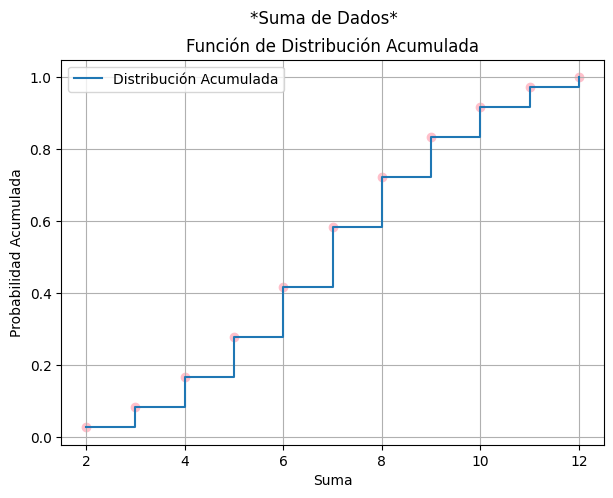

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product
from fractions import Fraction

# Definir el espacio muestral Omega
L = [i for i in range(1, 7)]  # lista de resultados posibles de un dado
Omega = set(product(L, repeat=2))  # producto cartesiano para lanzar dos dados

# Definir la función de probabilidad
def P(A, Omega):
    return Fraction(len(A), len(Omega))

# Obtener la variable aleatoria S (suma de los resultados de dos dados)
S = {(i, j): i + j for i, j in Omega}

# Crear un diccionario con la ley de probabilidad para cada suma
ley_suma = {n: set((i, j) for i, j in Omega if i + j == n) for n in range(2, 13)}

# Calcular la probabilidad de cada suma
ley_prob_suma = {n: P(ley_suma[n], Omega) for n in ley_suma}

# Crear un DataFrame con los resultados para poder graficar
df_ley_prob_suma = pd.DataFrame(list(ley_prob_suma.items()), columns=["Suma", "Probabilidad"])

# Graficar la función de distribución
df_ley_prob_suma["Distribucion_Acumulada"] = df_ley_prob_suma["Probabilidad"].cumsum()
plt.figure(figsize=(7, 5))
plt.step(df_ley_prob_suma["Suma"], df_ley_prob_suma["Distribucion_Acumulada"], where="post", label="Distribución Acumulada")
plt.scatter(df_ley_prob_suma["Suma"], df_ley_prob_suma["Distribucion_Acumulada"], color='pink')
plt.title("Función de Distribución Acumulada")
plt.suptitle("*Suma de Dados*")
plt.xlabel("Suma")
plt.ylabel("Probabilidad Acumulada")
plt.grid(True)
plt.legend()
plt.show()
